In [152]:
%matplotlib inline
import pandas as pd

In [153]:
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [154]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Englishman in L.A: The Movie,2017
1,Dong fang wu shen,1985
2,Duma o Kovpake: Nabat,1974
3,Royal Shakespeare Company: The Merchant of Venice,2015
4,First Lady,1937


In [155]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [163]:
titles['decade'] = titles['year']//10*10

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

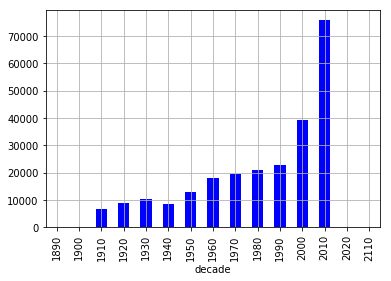

In [164]:
titles.groupby('decade').size().plot(kind='bar', color='blue', grid=True) 
# we want the number of films each decade,so we groupby decade and then use .size() to give us a count

### Use groupby() to plot the number of "Hamlet" films made each decade.

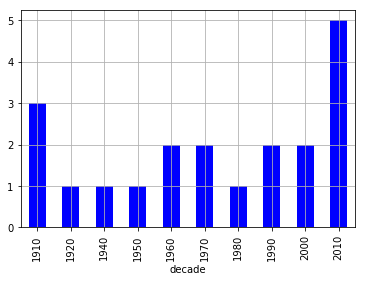

In [165]:
t = titles[titles['title'] == 'Hamlet']
t.groupby('decade').size().plot(kind='bar', color='blue', grid=True)
#filter dataset first to get only Hamlets, then groupby decade to get number of films in each decade

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [166]:
c = cast[(cast['n'] == 1) & (cast['year']//10 == 195)] #first step is always to filter/subset the data to only include the data you need
c.groupby(['year','type']).size()#for each year, we want to know the split between actors/actresses so we first groupby year and then type

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [167]:
c = cast[(cast['year']//10==195)& (cast['n']<=5)]
c.groupby(['n','type']).size()
#for each n, i want to know the split of actors and actresses

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [168]:
c = cast[cast['title']=='The Pink Panther']
c.groupby('year').size()

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [169]:
c = cast[cast['name'] == 'Frank Oz']
c = c.groupby('title').size()
c[c>1]

title
An American Werewolf in London          2
Follow That Bird                        3
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
The Dark Crystal                        2
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppet Movie                        8
The Muppets Take Manhattan              7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [170]:
c = cast[cast['name'] == 'Frank Oz'] #first filter the df to only include films Frank Oz was in
c = c.groupby('character').size() # since we want to know each of the characters he's played, we group by charaxters
c[c>2] # finally we only want characters he's played more than twice, so we can add a further condition

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64